In [7]:
#for classification using iris dataset for regression boston house prediction
from __future__ import division,print_function
import numpy as np
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Support Vector Classification

1.1 Load Iris Dataset

In [11]:
iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [14]:
def evaluate_on_test_data(model=None):
    predictions=model.predict(X_test)
    correct_classification=0
    for i in range(len(y_test)):
        if predictions[i]==y_test[i]:
            correct_classification+=1
    accuracy=100*correct_classification/len(y_test)
    return accuracy
            

In [15]:
kernels=('linear','poly','rbf')
accuracies=[]
for index,kernel in enumerate(kernels):
    model=svm.SVC(kernel=kernel)
    model.fit(X_train,y_train)
    acc=evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel={}".format(acc,kernel))

84.21052631578948 % accuracy obtained with kernel=linear
81.57894736842105 % accuracy obtained with kernel=poly
84.21052631578948 % accuracy obtained with kernel=rbf


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Visualize the decision boundary

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


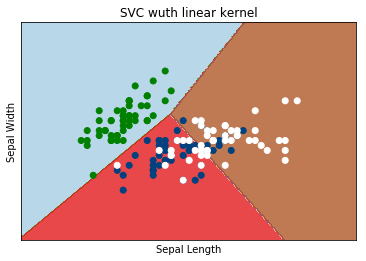

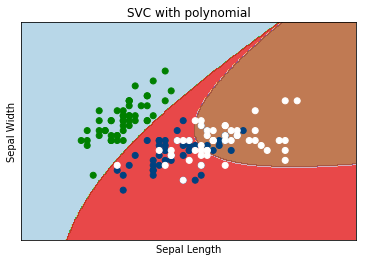

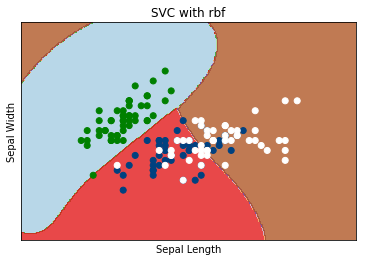

In [18]:
#Train SVM with different kernels

linear_svm=svm.SVC(kernel='linear').fit(X_train,y_train)
poly_svm=svm.SVC(kernel='poly',degree=3).fit(X_train,y_train)
rbf_svm=svm.SVC(kernel='rbf',gamma=0.7).fit(X_train,y_train)

#Create a mesh
h=.02
xmin,xmax=X[:,0].min()-1,X[:,0].max()+1
ymin,ymax=X[:,1].min()-1,X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

#Define title for the plots
titles=['SVC wuth linear kernel','SVC with polynomial','SVC with rbf']

for i,clf in enumerate((linear_svm,poly_svm,rbf_svm)):
    plt.figure(i)
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.8)
    
    #plottiong the training points
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.ocean)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()